### Import Libraries

In [1]:
import xarray as xr
import OpenVisus as ov
import openvisuspy as ovp
import numpy as np
import matplotlib.pyplot as plt

### Extract Latitude and Longitude from the netcdf file

Please download it from here: https://mega.nz/file/SB1UFbRA#h2FH1vmbHi8mvuYa9NQrd_MLaruoIaxP_M8yD-EEAeM

Please send an email to aashishpanta0@gmail.com if you have trouble accessing it.

In [2]:
ds=xr.open_dataset('../data/llc4320_latlon.nc')
lat_center = ds["latitude"].values
lon_center = ds["longitude"].values
ds

<xarray.Dataset> Size: 2GB
Dimensions:    (y: 12960, x: 17280)
Coordinates:
  * y          (y) int64 104kB 0 1 2 3 4 5 ... 12955 12956 12957 12958 12959
  * x          (x) int64 138kB 0 1 2 3 4 5 ... 17275 17276 17277 17278 17279
Data variables:
    latitude   (y, x) float32 896MB -88.18 -88.18 -88.18 ... 67.5 67.5 67.5
    longitude  (y, x) float32 896MB -114.9 -114.9 -114.9 ... -38.01 -38.0 -38.0
Attributes:
    title:        LLC4320 Mosaic Grid
    description:  Latitude and Longitude mosaic from LLC4320 faces 0, 1, 3, 4
    source:       Generated from MITgcm LLC4320 binary grid data

### Set Variables

In [3]:
#temperature="pelican://osg-htc.org/nasa/nsdf/climate1/llc4320/idx/theta/theta_llc4320_x_y_depth.idx" #aka theta
temperature="https://nsdf-climate1-origin.nationalresearchplatform.org:50098/nasa/nsdf/climate1/llc4320/idx/theta/theta_llc4320_x_y_depth.idx"

#salinity="pelican://osg-htc.org/nasa/nsdf/climate1/llc4320/idx/salt/salt_llc4320_x_y_depth.idx"
salinity="https://nsdf-climate1-origin.nationalresearchplatform.org:50098/nasa/nsdf/climate1/llc4320/idx/salt/salt_llc4320_x_y_depth.idx"

#w="pelican://osg-htc.org/nasa/nsdf/climate2/llc4320/idx/w/w_llc4320_x_y_depth.idx"
w="https://nsdf-climate1-origin.nationalresearchplatform.org:50098/nasa/nsdf/climate1/llc4320/idx/w/w_llc4320_x_y_depth.idx"

### Use Array Index to extract Data and Lat/Lon

In [4]:
def extract_data_latlon(
  field, lat_center, lon_center, x_range, y_range, z=[0, 1], quality=0
):
  db = ovp.LoadDataset(field)
  data = db.db.read(x=x_range, y=y_range, z=z, quality=quality)[0, :, :]
  lat = lat_center[y_range[0] : y_range[1], x_range[0] : x_range[1]]
  lon = lon_center[y_range[0] : y_range[1], x_range[0] : x_range[1]]
  return data, lat, lon


In [ ]:
x_range = [6800, 9600]
y_range = [5200, 7600]
data_sub, lat_sub, lon_sub = extract_data_latlon(salinity, lat_center, lon_center, x_range, y_range)

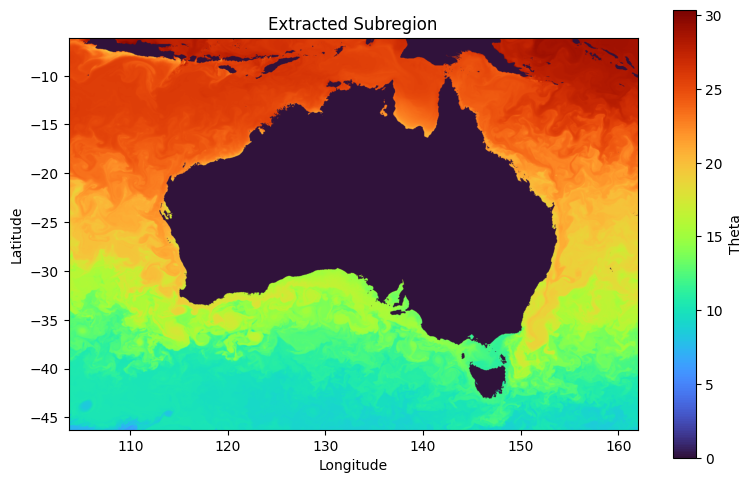

In [ ]:
plt.figure(figsize=(8, 5))
plt.imshow(
  data_sub,
  cmap="turbo",
  origin="lower",
  extent=[lon_sub.min(), lon_sub.max(), lat_sub.min(), lat_sub.max()],
)
plt.colorbar(label="Theta")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Extracted Subregion")
plt.tight_layout()
plt.show()


### Use Lat/Lon to extract corresponding data

In [ ]:
def extract_data_by_latlon_range(
  field, lat_center, lon_center, lat_range, lon_range, z=[0, 1], quality=0
):
  db = ovp.LoadDataset(field)

  mask = (
    (lat_center >= lat_range[0])
    & (lat_center <= lat_range[1])
    & (lon_center >= lon_range[0])
    & (lon_center <= lon_range[1])
  )

  y_indices, x_indices = np.where(mask)

  if len(x_indices) == 0 or len(y_indices) == 0:
    raise ValueError("No data found in the given lat/lon range.")

  x_min = int(x_indices.min())
  x_max = int(x_indices.max()) + 1
  y_min = int(y_indices.min())
  y_max = int(y_indices.max()) + 1

  data = db.db.read(x=[x_min, x_max], y=[y_min, y_max], z=z, quality=quality)[0, :, :]
  lat = lat_center[y_min:y_max, x_min:x_max]
  lon = lon_center[y_min:y_max, x_min:x_max]

  return data, lat, lon

In [ ]:
lat_range = [-40, -10]
lon_range = [105, 160]

data, lat, lon = extract_data_by_latlon_range(temperature, lat_center, lon_center, lat_range, lon_range)


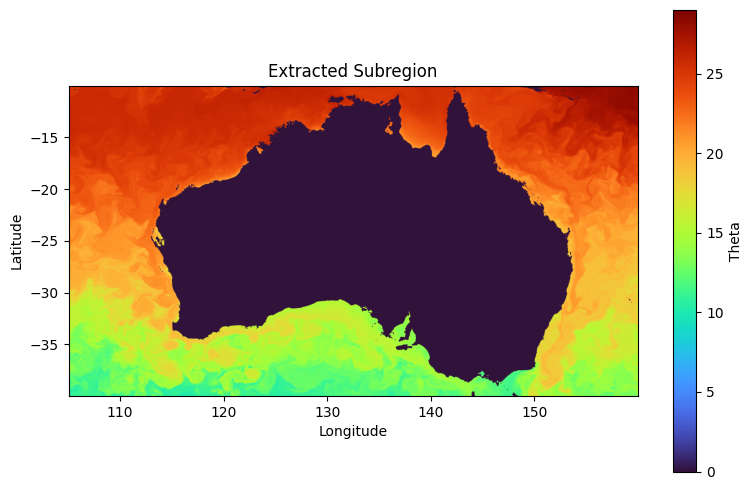

In [ ]:
plt.figure(figsize=(8, 5))
plt.imshow(data, cmap="turbo", origin="lower", extent=[
    lon.min(), lon.max(), lat.min(), lat.max()])
plt.colorbar(label="Theta")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Extracted Subregion")
plt.tight_layout()
plt.show()